Optimal cluster count: 8


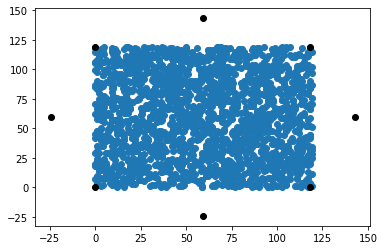

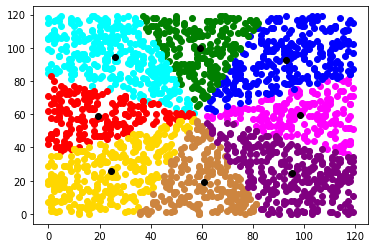

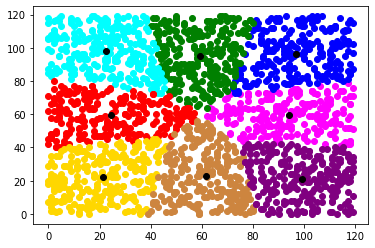

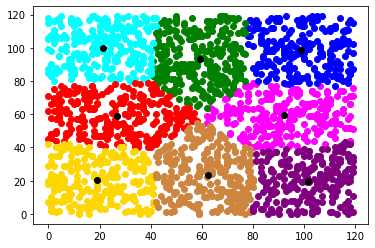

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

def dist(p1, p2):
  return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)

def random_points(n):
  points = []
  for i in range(n):
    points.append(Point(np.random.randint(0,120), np.random.randint(0,120)))
  return points

def get_centroids(points, k):
  x = np.mean(list(map(lambda point: point.x, points)))
  y = np.mean(list(map(lambda point: point.y, points)))
  R = 0
  for p in points:
    R = max(R, dist(p, Point(x, y)))
  
  centroids = []
  for i in range(k):
    centroids.append(Point(
        x + R*np.cos(2*np.pi*i/k), 
        y + R*np.sin(2*np.pi*i/k)))
  return centroids

def get_closest_cluster(point, centroids):
  min = dist(point, centroids[0])
  minIndex = 0
  for i in range(len(centroids)):
    distance = dist(point, centroids[i])
    if (min > distance):
      min = distance
      minIndex = i
  return minIndex

def get_centroid(points):
  x = np.mean(list(map(lambda point: point.x, points)))
  y = np.mean(list(map(lambda point: point.y, points)))
  return Point(x, y)

def get_criteria(clustering, centroids):
  sum = 0
  for index in range(len(clustering)):
    for point in clustering[index]:
      sum += dist(point, centroids[index])**2
  return sum

def show_results(clustering, centroids):
  colors = ['magenta', 'blue', 'green', 'cyan', 'red', 'gold', 'peru', 'purple', 'orange', 'pink']
  for cluster in clustering:
    plt.scatter(list(map(lambda point: point.x, cluster)),
            list(map(lambda point: point.y, cluster)),
            color=colors[clustering.index(cluster)])
    
  plt.scatter(list(map(lambda point: point.x, centroids)),
            list(map(lambda point: point.y, centroids)),
            color='black')
  plt.show()

def show_optimal(results, points, k):
  criterias = []
  for index in range(len(results)-1):
    criterias.append(abs(results[index] - results[index+1])
                    /abs(results[index-1] - results[index]))

  optimal_index = criterias.index(min(criterias))
  print(f'Optimal cluster count: {optimal_index + 1}')

  k = optimal_index + 1
  opt_centroids = get_centroids(points, k)
  plt.scatter(list(map(lambda point: point.x, points)),
              list(map(lambda point: point.y, points)))
      
  plt.scatter(list(map(lambda point: point.x, opt_centroids)),
              list(map(lambda point: point.y, opt_centroids)),
              color='black')
  plt.show()

  for im in range(m):
    opt_clustering = []
    for ik in range(k):
      opt_clustering.append([])

    for point in points:
      index = get_closest_cluster(point, opt_centroids)
      opt_clustering[index].append(point)

    opt_centroids = []
    for ik in range(k):
      opt_centroids.append(get_centroid(opt_clustering[ik]))

    show_results(opt_clustering, opt_centroids)

if __name__ == "__main__":
  n = 2000
  m = 3
  cluster_count = 10

results = []
clustering_result = []
centroids_result = []

points = random_points(n)
for k in range(1,cluster_count):
  centroids = get_centroids(points, k)

  for im in range(m):
    clustering = [];
    for ik in range(k):
      clustering.append([])

    for point in points:
      index = get_closest_cluster(point, centroids)
      clustering[index].append(point)

    centroids = []
    for ik in range(k):
      centroids.append(get_centroid(clustering[ik]))

  clustering_result.append(clustering)
  centroids_result.append(centroids)
  results.append(get_criteria(clustering, centroids))


show_optimal(results, points, k)

#show_results(clustering_result[4], centroids_result[4])